<a href="https://colab.research.google.com/github/munenecarl/Covid19-Online-Comments-Sentiment-Analysis/blob/main/Sentiment_analysis_on_YT_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data decription***

\
This dataset consists of YouTube video and comment metadata for COVID-19 related videos in January 2021.

The videos in this dataset are between January 1st, 2021 and January 30th, 2021. The dataset contains the most-viewed videos that were related to at least one of the following search queries: coronavirus, covid-19, pandemic, and vaccine

In [4]:
#Loading and viewing the dataset
import pandas as pd
yt_comments = pd.read_csv('/content/covid_2021_1.csv')

#viewing the data
yt_comments

,query,url,title,upload_date,channel,views,likes,dislikes,comment_count,comment_text,comment_author,comment_date,comment_likes,DATE
0,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,OMG 😍💋 💝💖❤️,Brendan Eric,2021-01-01T09:23:59Z,0,2021-01-01 09:04:16+00:00
1,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,I love my Indian Mumbai me welcome,Bhallesingh Rathore rathore,2021-01-01T09:06:51Z,1,2021-01-01 09:04:16+00:00
2,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,What about indian vaccine?,Kudip singh hong kong.,2021-02-03T08:17:14Z,0,2021-01-01 09:04:16+00:00
3,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,2:32 I like that😍💋 💝💖❤️,Bo Brice,2021-01-01T09:55:34Z,0,2021-01-01 09:04:16+00:00
4,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=dwMWM1F7NMI,Growing Number Of Americans Going Hungry Durin...,2021-01-01T11:59:49Z,NBC News,74546,874,62,601,And all the rich companies that have profited ...,Poppy Jalto,2021-01-01T13:17:56Z,93,2021-01-01 11:59:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41583,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Thanks da,Urmila Vichare,2021-01-30T05:04:34Z,1,2021-01-30 04:27:07+00:00
41584,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,👍👍 very helpful information,Bhagya and Mumma,2021-01-31T05:39:23Z,2,2021-01-30 04:27:07+00:00
41585,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,👍,Rushali Bakarekar,2021-02-01T08:50:00Z,1,2021-01-30 04:27:07+00:00
41586,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Very very much informative vlog..Sunny da ne v...,Madhuri Sonavane,2021-01-30T04:45:07Z,1,2021-01-30 04:27:07+00:00


# *Data preprocessing*

In [7]:
# viewing the types of comments in the data set
unique_comments = yt_comments['comment_text'].unique()
unique_comments

array(['OMG 😍💋 💝💖❤️', 'I love my Indian Mumbai me welcome',
       'What about indian vaccine?', ..., '👍👍 very helpful information',
       'Very very much informative vlog..Sunny da ne vaccine baddal jo experience share kela aahe tya baddal khup afwa samaj gairsamaj hote te sarv dur zale astil jyanna pn astil..khup deep mdhe right from to go for vaccine till any side effects preacautions prynt sarv kahi khup chhan explain kel aahe.. Thnk u so much Dr.Sunny da..god bless u',
       'Thanking you for this information'], dtype=object)

\
The comment text that was chosen bove shows that some of the comments have emojis. Using the library emojis we are going to remove the emojis so that the analysis focuses solely on the text


In [3]:
!pip install emoji
import emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
# creating a function to remove emojis
def remove_emojis(text):
    return emoji.demojize(text)

# Fill NaN values in the 'comment_text' column with an empty string
yt_comments['comment_text'] = yt_comments['comment_text'].fillna('')

# Applying the remove_emojis function to the comment_text column
yt_comments['comment_text'] = yt_comments['comment_text'].apply(remove_emojis)


In [ ]:
yt_comments['comment_text'].values[0]

'OMG :smiling_face_with_heart-eyes::kiss_mark: :heart_with_ribbon::sparkling_heart::red_heart:'

In [ ]:
#viewing the data after removing the emojis
yt_comments

,query,url,title,upload_date,channel,views,likes,dislikes,comment_count,comment_text,comment_author,comment_date,comment_likes,DATE
0,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,OMG :smiling_face_with_heart-eyes::kiss_mark: ...,Brendan Eric,2021-01-01T09:23:59Z,0,2021-01-01 09:04:16+00:00
1,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,I love my Indian Mumbai me welcome,Bhallesingh Rathore rathore,2021-01-01T09:06:51Z,1,2021-01-01 09:04:16+00:00
2,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,What about indian vaccine?,Kudip singh hong kong.,2021-02-03T08:17:14Z,0,2021-01-01 09:04:16+00:00
3,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,2:32 I like that:smiling_face_with_heart-eyes:...,Bo Brice,2021-01-01T09:55:34Z,0,2021-01-01 09:04:16+00:00
4,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=dwMWM1F7NMI,Growing Number Of Americans Going Hungry Durin...,2021-01-01T11:59:49Z,NBC News,74546,874,62,601,And all the rich companies that have profited ...,Poppy Jalto,2021-01-01T13:17:56Z,93,2021-01-01 11:59:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41583,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Thanks da,Urmila Vichare,2021-01-30T05:04:34Z,1,2021-01-30 04:27:07+00:00
41584,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,:thumbs_up::thumbs_up: very helpful information,Bhagya and Mumma,2021-01-31T05:39:23Z,2,2021-01-30 04:27:07+00:00
41585,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,:thumbs_up:,Rushali Bakarekar,2021-02-01T08:50:00Z,1,2021-01-30 04:27:07+00:00
41586,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Very very much informative vlog..Sunny da ne v...,Madhuri Sonavane,2021-01-30T04:45:07Z,1,2021-01-30 04:27:07+00:00


# ***Exploratory Data Anaylsis***



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# using ggplot style plots
plt.style.use('ggplot')
# natural language toolkit
import nltk

In [ ]:
yt_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41588 entries, 0 to 41587
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   query           41588 non-null  object
 1   url             41588 non-null  object
 2   title           41588 non-null  object
 3   upload_date     41588 non-null  object
 4   channel         41588 non-null  object
 5   views           41588 non-null  int64 
 6   likes           41588 non-null  int64 
 7   dislikes        41588 non-null  int64 
 8   comment_count   41588 non-null  int64 
 9   comment_text    41588 non-null  object
 10  comment_author  41588 non-null  object
 11  comment_date    41588 non-null  object
 12  comment_likes   41588 non-null  int64 
 13  DATE            41588 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.4+ MB


In [ ]:
#checking the number 0f rows and columns

# Number of rows
num_rows = len(yt_comments)
num_rows

41588

In [ ]:
# Number of columns
num_columns = len(yt_comments.columns)
num_columns

14

\
The dataset contains 41588 rows and 14 columns.

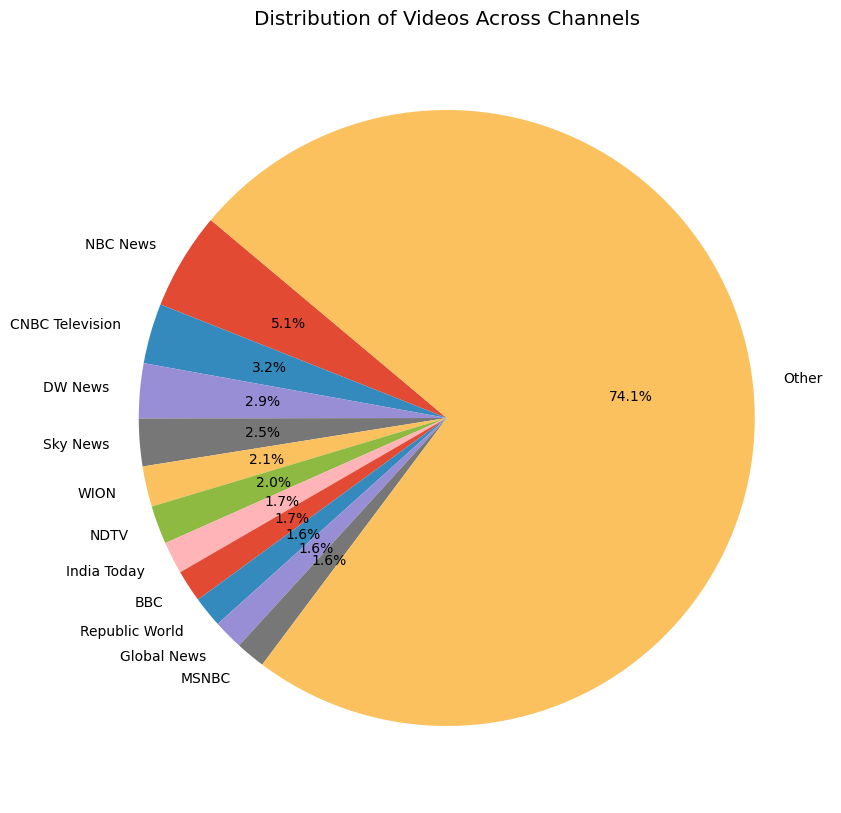

In [ ]:
#channel is the column containing channel names
channel_counts = yt_comments['channel'].value_counts()

# Threshold to categorize channels into 'main' and 'other'
threshold = 600

# Filter channels based on the threshold
main_channels = channel_counts[channel_counts >= threshold]
other_channels = channel_counts[channel_counts < threshold]

# Combine smaller channels into an 'Other' category
other_channels_count = other_channels.sum()
main_channels['Other'] = other_channels_count

# Plotting a pie chart
plt.figure(figsize=(10, 10))
plt.pie(main_channels, labels=main_channels.index, autopct='%1.1f%%',
        startangle=140)
plt.title('Distribution of Videos Across Channels')
plt.show()

In [ ]:
# comment_author is the column containing author names
multiple_comment_authors = yt_comments['comment_author'].value_counts()

# Select authors who have commented more than once
multiple_comment_authors = multiple_comment_authors[multiple_comment_authors > 10]

# Display the authors who have commented multiple times
print("Authors with Multiple Comments:")
print(multiple_comment_authors)

Authors with Multiple Comments:
Lulu Garcia                   29
John K                        29
lulu111593                    29
Sammy Westenberger            21
squeeze bag                   20
BigDutchKingTut               20
Marek Kolenda                 18
HUDSON JOSEPH                 17
HilarityBribo                 17
Beverly B                     16
piggyroo100                   15
John Burns                    15
Ppk                           15
Maria Herrera                 15
gianni paladini               14
new reach                     14
Peter Piper                   13
Shayer Tjandra                13
Mandi's Houseplant Channel    12
DAVID                         12
Delite Wetiko                 12
sanujit roy                   12
Bill .Meelayder               12
Indu bhardwaj                 12
Kelly T                       11
Osmosis Jones                 11
Robert Kurose                 11
Jeff Etow                     11
J                             11
Cinda Ander

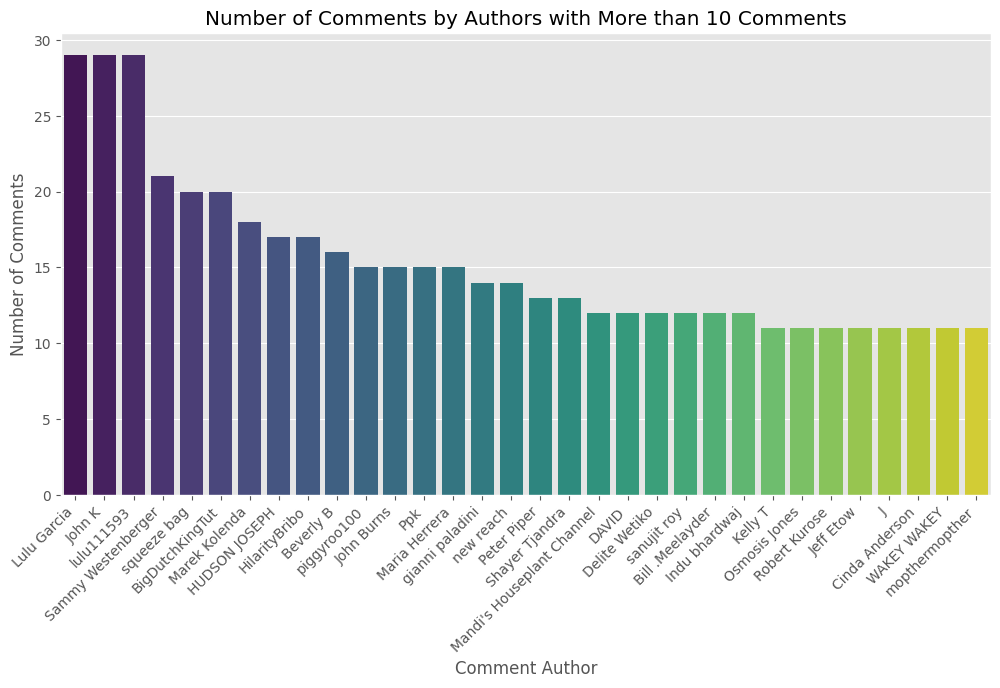

In [ ]:
import seaborn as sns
# Plotting a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=multiple_comment_authors.index, y=multiple_comment_authors.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Comment Author')
plt.ylabel('Number of Comments')
plt.title('Number of Comments by Authors with More than 10 Comments')
plt.show()

# ***Basic NLTK***

In [ ]:
# printing an example of the types of comments found in the dataset
example = yt_comments['comment_text'][50]
print(example)

Stop paying taxes


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# using the nltk to split the sentence from the example above into individual words
tokens = nltk.word_tokenize(example)
tokens[:20]

['Stop', 'paying', 'taxes']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# finding the part of speech for each token
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Stop', 'NNP'), ('paying', 'VBG'), ('taxes', 'NNS')]

\
stop is classified as a proper noun

paying is classified as a verb gerund

taxes is classified as noun plural

# ***Pos Tagging codes***

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
# group the data into chunks based on the tags
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S Stop/NNP paying/VBG taxes/NNS)


# ***VADER Sentiment Scoring***

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # progress bar tracker
sia = SentimentIntensityAnalyzer()

In [ ]:
#checking the polarity score on the previous example
sia.polarity_scores(example)

{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}

\
The compund score is a negative value. This implies that the sentence "Stop paying taxes" is negative.

In [ ]:
#Running the polarity scores on the entire dataset
results={}
for i, row in tqdm(yt_comments.iterrows(),total=len(yt_comments)):
 text=row["comment_text"]
 myid=row["comment_author"]
 results[myid]=sia.polarity_scores(text)


  0%|          | 0/41588 [00:00<?, ?it/s]

In [ ]:
results

{'Brendan Eric': {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4754},
 'Bhallesingh Rathore rathore': {'neg': 0.0,
  'neu': 0.357,
  'pos': 0.643,
  'compound': 0.802},
 'Kudip singh hong kong.': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'Bo Brice': {'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.4754},
 'Poppy Jalto': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Stimulus Dragon': {'neg': 0.342,
  'neu': 0.658,
  'pos': 0.0,
  'compound': -0.6369},
 'T.R. Cuppett': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Daniel Oliver': {'neg': 0.145,
  'neu': 0.675,
  'pos': 0.18,
  'compound': 0.1585},
 'Arnold Apostol': {'neg': 0.232,
  'neu': 0.644,
  'pos': 0.124,
  'compound': -0.2942},
 'Simgor2': {'neg': 0.122, 'neu': 0.611, 'pos': 0.267, 'compound': 0.3818},
 'Hanna': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'SCAMPISH FOXX': {'neg': 0.239,
  'neu': 0.676,
  'pos': 0.085,
  'compound': -0.3774},
 'Jarid Gaming': {'n

In [ ]:
# convert the result dictionary into a panda dataframe
vaders_df = pd.DataFrame(results).T
vaders_df

,neg,neu,pos,compound
Brendan Eric,0.0,0.492,0.508,0.4754
Bhallesingh Rathore rathore,0.0,0.357,0.643,0.8020
Kudip singh hong kong.,0.0,1.000,0.000,0.0000
Bo Brice,0.0,0.393,0.607,0.4754
Poppy Jalto,0.0,1.000,0.000,0.0000
...,...,...,...,...
Deepali Ravan,0.0,1.000,0.000,0.0000
Urmila Vichare,0.0,0.256,0.744,0.4404
Bhagya and Mumma,0.0,0.492,0.508,0.4754
Rushali Bakarekar,0.0,1.000,0.000,0.0000


In [ ]:
# transpose the dictionary
vaders_df = vaders_df.reset_index().rename(columns= {'index': 'id'})
vaders_df = pd.concat([vaders_df, yt_comments], axis = 1)

In [ ]:
vaders_df

,id,neg,neu,pos,compound,query,url,title,upload_date,channel,views,likes,dislikes,comment_count,comment_text,comment_author,comment_date,comment_likes,DATE
0,Brendan Eric,0.0,0.492,0.508,0.4754,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,OMG :smiling_face_with_heart-eyes::kiss_mark: ...,Brendan Eric,2021-01-01T09:23:59Z,0,2021-01-01 09:04:16+00:00
1,Bhallesingh Rathore rathore,0.0,0.357,0.643,0.8020,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,I love my Indian Mumbai me welcome,Bhallesingh Rathore rathore,2021-01-01T09:06:51Z,1,2021-01-01 09:04:16+00:00
2,Kudip singh hong kong.,0.0,1.000,0.000,0.0000,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,What about indian vaccine?,Kudip singh hong kong.,2021-02-03T08:17:14Z,0,2021-01-01 09:04:16+00:00
3,Bo Brice,0.0,0.393,0.607,0.4754,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,2:32 I like that:smiling_face_with_heart-eyes:...,Bo Brice,2021-01-01T09:55:34Z,0,2021-01-01 09:04:16+00:00
4,Poppy Jalto,0.0,1.000,0.000,0.0000,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=dwMWM1F7NMI,Growing Number Of Americans Going Hungry Durin...,2021-01-01T11:59:49Z,NBC News,74546,874,62,601,And all the rich companies that have profited ...,Poppy Jalto,2021-01-01T13:17:56Z,93,2021-01-01 11:59:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41583,NaN,NaN,NaN,NaN,NaN,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Thanks da,Urmila Vichare,2021-01-30T05:04:34Z,1,2021-01-30 04:27:07+00:00
41584,NaN,NaN,NaN,NaN,NaN,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,:thumbs_up::thumbs_up: very helpful information,Bhagya and Mumma,2021-01-31T05:39:23Z,2,2021-01-30 04:27:07+00:00
41585,NaN,NaN,NaN,NaN,NaN,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,:thumbs_up:,Rushali Bakarekar,2021-02-01T08:50:00Z,1,2021-01-30 04:27:07+00:00
41586,NaN,NaN,NaN,NaN,NaN,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Very very much informative vlog..Sunny da ne v...,Madhuri Sonavane,2021-01-30T04:45:07Z,1,2021-01-30 04:27:07+00:00


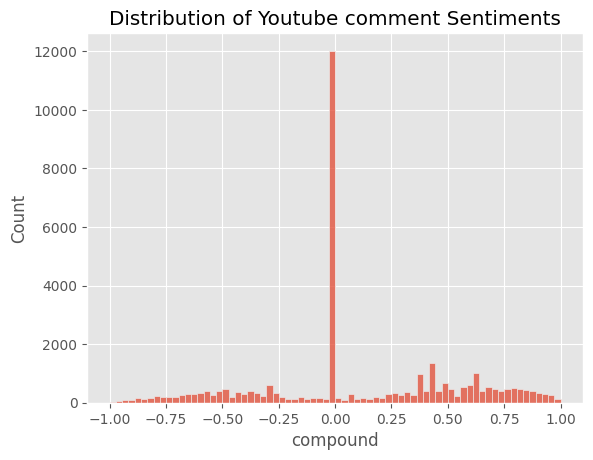

In [ ]:
vader_plot = sns.histplot(data= vaders_df, x = 'compound')
vader_plot.set_title("Distribution of Youtube comment Sentiments")
plt.show()

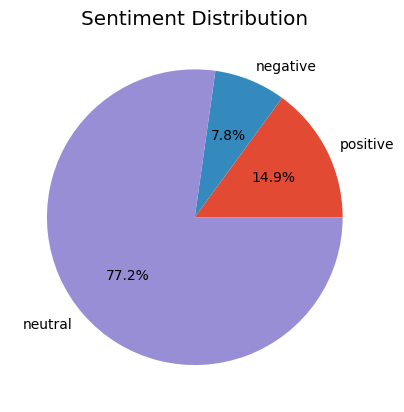

In [ ]:
# Assuming vaders_df is your DataFrame with sentiment scores
vaders_pos = vaders_df['pos'].mean()
vaders_neg = vaders_df['neg'].mean()
vaders_neu = vaders_df['neu'].mean()

vader_distrib = {
    'sentiment': ['positive', 'negative', 'neutral'],
    'value': [vaders_pos, vaders_neg, vaders_neu]
}

vaders_perc_distrib = pd.DataFrame(vader_distrib)

# Plotting a pie chart with percentages inside
plt.pie(vaders_perc_distrib['value'], labels=vaders_perc_distrib['sentiment'],
        autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.show()


In [ ]:
vaders_perc_distrib

,sentiment,value
0,positive,0.149310
1,negative,0.078140
2,neutral,0.771373


# ***Roberta model***

In [ ]:
#roberta model
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax # the output needs smoothing between 0 and 1

In [ ]:
# using the pretrained base sentiment model
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# vader results
print(example)
sia.polarity_scores(example)

Stop paying taxes


{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}

In [ ]:
# roberta results
# encoding text
# 1, 0 values that the model understands
encoded_text = tokenizer(example, return_tensors = 'pt')
encoded_text

{'input_ids': tensor([[    0, 22174,  2746,  2556,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [ ]:
# roberta results
rob_eg_out = model(**encoded_text)
# convert from tensor to np
rob_eg_out

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7481,  0.4062, -2.3333]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
rob_scores = rob_eg_out[0][0].detach().numpy()
rob_scores = softmax(rob_scores)
rob_scores

array([0.7823248 , 0.20446664, 0.01320856], dtype=float32)

In [ ]:
rob_scores_dict = {'roberta_neg': rob_scores[0],
'roberta_neu': rob_scores[1],
'roberta_pos': rob_scores[2]}
rob_scores_dict

{'roberta_neg': 0.7823248,
 'roberta_neu': 0.20446664,
 'roberta_pos': 0.013208555}

In [ ]:
#running the roberta model on the whole dataset
def polarity_roberta(examples):
 encoded_text = tokenizer(example, return_tensors = 'pt')
 rob_eg_out = model(**encoded_text)
 rob_scores = rob_eg_out[0][0].detach().numpy()
 rob_scores = softmax(rob_scores)
 rob_scores_dict = {'roberta_neg': rob_scores[0],
 'roberta_neu': rob_scores[1],
 'roberta_pos': rob_scores[2]}
 return rob_scores_dict

In [ ]:
res = {}
# perform the polarity scoring and show progres in a progress bar below
for i, row in tqdm(yt_comments.iterrows(), total = len(yt_comments)):
 try: # adding this in case text is too large
  text = row['comment_text']
  index = row['comment_author']
  vader_result = sia.polarity_scores(text)
  vader_result_rename = {}
#rename vader result keys into vader_neu, vader_pos, vader_neg
  for key, value in vader_result.items():
   vader_result_rename[f'vader_{key}'] = value
  roberta_result = polarity_roberta(text)
  both = vader_result_rename | roberta_result
  res[index] = both
 except RuntimeError:
  print(f'Did not run for {index}')

  0%|          | 0/41588 [00:00<?, ?it/s]

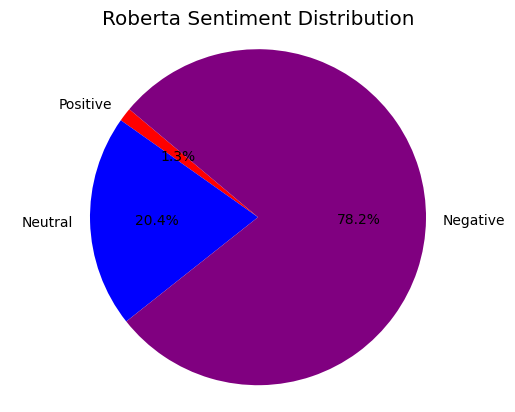

In [ ]:
#visualization of the roberta sentiments
roberta_pos = roberta_result['roberta_pos'].sum()
roberta_neu = roberta_result['roberta_neu'].sum()
roberta_neg = roberta_result['roberta_neg'].sum()
# Data for the pie chart
labels = ['Positive', 'Neutral', 'Negative']
sizes = [roberta_pos, roberta_neu, roberta_neg]
colors = ['red', 'blue', 'purple']
# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
startangle=140)
plt.title('Roberta Sentiment Distribution')
plt.axis('equal')
plt.show()

In [ ]:
rob_n_vaders_df = pd.DataFrame(res).T
rob_n_vaders_df

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
Brendan Eric,0.0,0.492,0.508,0.4754,0.782325,0.204467,0.013209
Bhallesingh Rathore rathore,0.0,0.357,0.643,0.8020,0.782325,0.204467,0.013209
Kudip singh hong kong.,0.0,1.000,0.000,0.0000,0.782325,0.204467,0.013209
Bo Brice,0.0,0.393,0.607,0.4754,0.782325,0.204467,0.013209
Poppy Jalto,0.0,1.000,0.000,0.0000,0.782325,0.204467,0.013209
...,...,...,...,...,...,...,...
Deepali Ravan,0.0,1.000,0.000,0.0000,0.782325,0.204467,0.013209
Urmila Vichare,0.0,0.256,0.744,0.4404,0.782325,0.204467,0.013209
Bhagya and Mumma,0.0,0.492,0.508,0.4754,0.782325,0.204467,0.013209
Rushali Bakarekar,0.0,1.000,0.000,0.0000,0.782325,0.204467,0.013209


In [ ]:
# transpose the dictionary
rob_n_vaders_df = rob_n_vaders_df.reset_index().rename(columns= {'index': 'id'})
rob_n_vaders_df = pd.concat([rob_n_vaders_df, yt_comments], axis = 1)

In [ ]:
#comparing the results
rob_n_vaders_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'query', 'url', 'title',
       'upload_date', 'channel', 'views', 'likes', 'dislikes', 'comment_count',
       'comment_text', 'comment_author', 'comment_date', 'comment_likes',
       'DATE'],
      dtype='object')

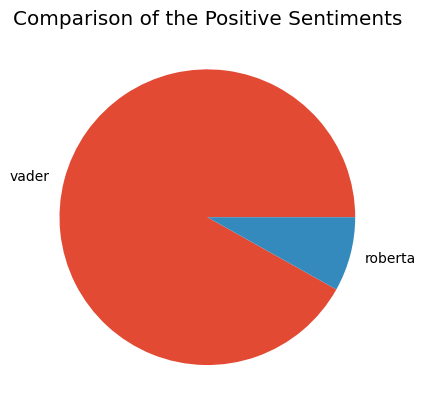

In [ ]:
vaders_pos = rob_n_vaders_df['vader_pos'].mean()
roberta_pos = rob_n_vaders_df['roberta_pos'].mean()
rob_vader_distrib = {'sentiment': ['vader', 'roberta'],
'value' : [vaders_pos,roberta_pos]}
rob_vaders_perc_distrib = pd.DataFrame(rob_vader_distrib)
plt.pie(rob_vaders_perc_distrib['value'],
labels = rob_vaders_perc_distrib['sentiment'])
plt.title("Comparison of the Positive Sentiments")
plt.show()

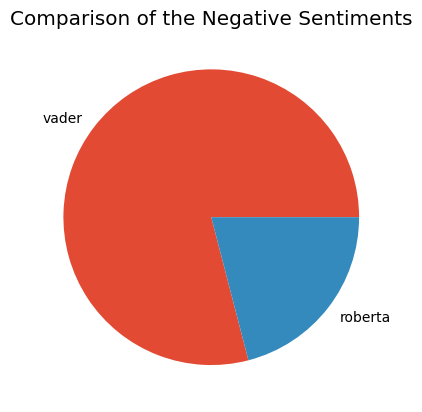

In [ ]:
vaders_neu = rob_n_vaders_df['vader_neu'].mean()
roberta_neu = rob_n_vaders_df['roberta_neu'].mean()
rob_vader_distrib = {'sentiment': ['vader', 'roberta'],
'value' : [vaders_neu,roberta_neu]}
rob_vaders_perc_distrib = pd.DataFrame(rob_vader_distrib)
plt.pie(rob_vaders_perc_distrib['value'],
labels = rob_vaders_perc_distrib['sentiment'])
plt.title("Comparison of the Negative Sentiments")
plt.show()

In [ ]:
rob_n_vaders_df.query('likes=>1').sort_values(vader_neg, ascending = False)['comment_text'].values[]